# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [1]:
import pandas as pd
df = pd.read_csv('spambase_data.csv',header =None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [2]:
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [5]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

### Prediction and Evaluation

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
predictions = knn.predict(X_test)

In [8]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       863
           1       0.70      0.69      0.69       518

    accuracy                           0.77      1381
   macro avg       0.76      0.76      0.76      1381
weighted avg       0.77      0.77      0.77      1381

Confusion Matrix
[[710 153]
 [161 357]]

 Accuracy
0.7726285300506879


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492,0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821,0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386,0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861,0


In [9]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.77090119 0.78586957 0.825      0.80543478 0.69456522]
mean score:  0.7763541519142709


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [10]:
#eucledian
print('eucledian')
from sklearn import preprocessing
#normalization ##########################
#min-max normalization
for col in df.columns[:-1]:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
X = df[df.columns[:-1]] # Selecting the independent variables
Y = df[df.columns[len(df.columns)-1]] # selecting only the target lableled column
knn_eu = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_eu, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

eucledian
scores:  [0.8534202  0.88695652 0.90652174 0.90434783 0.73913043]
mean score:  0.8580753434357741


In [11]:
#manhattan
print('manhattan')
knn_mh = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores = cross_val_score(knn_mh, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

manhattan
scores:  [0.86536374 0.90434783 0.90978261 0.89456522 0.75      ]
mean score:  0.8648118774488976


#### Q2: Write your observation regarding change in the perfromance of KNN

better accuracy came out using manhattan

#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [12]:
#### Code here ####
knn1 = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
scores = cross_val_score(knn1, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [13]:
#### Code here ####
Listl = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    print('knn number of # neigbours ' ,i)
    print('scores: for knn', scores)
    print('mean score: ', scores.mean())
    Listl.append(scores.mean());

knn number of # neigbours  1
scores: for knn [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891
knn number of # neigbours  2
scores: for knn [0.84256243 0.88804348 0.91413043 0.88152174 0.78586957]
mean score:  0.8624255299060568
knn number of # neigbours  3
scores: for knn [0.8534202  0.88695652 0.90652174 0.90434783 0.73913043]
mean score:  0.8580753434357741


KeyboardInterrupt: 

In [84]:
print('list of mean score')
#print(Listl)
print('max value::', max(Listl))
index =Listl.index(max(Listl))
print('max k ::', index+1)

list of mean score
max value:: 0.8769862625690413
max k :: 9


#### Q5: Plot the graph between k and the accuracy score and find the best value of k

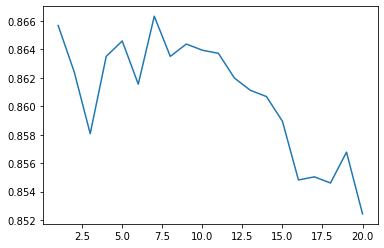

In [48]:
#### Write your answer here ####
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.arange(1,21), Listl)

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [63]:
#### Code here ####
Listm = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    print('knn number of # neigbours ' ,i)
    print('scores: for knn', scores)
    print('mean score: ', scores.mean())
    Listm.append(scores.mean())


knn number of # neigbours  1
scores: for knn [0.86862106 0.89456522 0.91195652 0.89565217 0.75543478]
mean score:  0.8652459519425955
knn number of # neigbours  2
scores: for knn [0.85016287 0.88804348 0.90108696 0.875      0.81521739]
mean score:  0.8659021385072936
knn number of # neigbours  3
scores: for knn [0.86536374 0.90434783 0.90978261 0.89456522 0.75      ]
mean score:  0.8648118774488976
knn number of # neigbours  4
scores: for knn [0.86102063 0.89021739 0.91086957 0.87717391 0.79347826]
mean score:  0.8665519520370107
knn number of # neigbours  5
scores: for knn [0.87187839 0.9        0.92282609 0.90108696 0.76630435]
mean score:  0.8724191568710757
knn number of # neigbours  6
scores: for knn [0.85450597 0.89021739 0.92173913 0.89347826 0.78913043]
mean score:  0.8698142378322238
knn number of # neigbours  7
scores: for knn [0.86753529 0.90108696 0.92717391 0.9        0.77282609]
mean score:  0.8737244488504933
knn number of # neigbours  8
scores: for knn [0.85450597 0.886

In [83]:
#print('list of mean score')
#print(Listl)
print('max value::', max(Listm))
index =Listm.index(max(Listm))
print('max k ::', index+1)

max value:: 0.8854612189019498
max k :: 8


#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

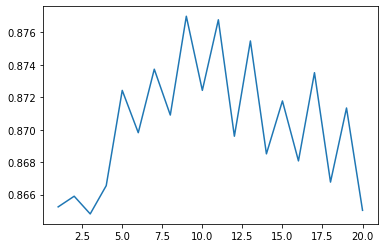

In [65]:
#### Write your answer here ####
#### Write your answer here ####
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.arange(1,21), Listm)

#### Q8: Write your observation

for eucledian max at k = 6 and manhattan = 8 

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [70]:
#### Code here ####
knn4 = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='distance')
scores = cross_val_score(knn4, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.87839305 0.9076087  0.925      0.90869565 0.77391304]
mean score:  0.8787220884671669


#### Q10: What is the best k value in this model. Take max k =20

In [76]:
#### Write your answer here ####
Listn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan',weights='distance')
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    print('knn number of # neigbours ' ,i)
    print('scores: for knn', scores)
    print('mean score: ', scores.mean())
    Listn.append(scores.mean())


knn number of # neigbours  1
scores: for knn [0.86862106 0.89456522 0.91195652 0.89565217 0.75543478]
mean score:  0.8652459519425955
knn number of # neigbours  2
scores: for knn [0.86862106 0.89456522 0.91195652 0.89565217 0.75652174]
mean score:  0.8654633432469433
knn number of # neigbours  3
scores: for knn [0.8762215  0.90869565 0.91304348 0.9        0.7576087 ]
mean score:  0.8711138648916584
knn number of # neigbours  4
scores: for knn [0.88599349 0.9076087  0.9173913  0.90652174 0.76630435]
mean score:  0.8767639144597081
knn number of # neigbours  5
scores: for knn [0.87839305 0.9076087  0.925      0.90869565 0.77391304]
mean score:  0.8787220884671669
knn number of # neigbours  6
scores: for knn [0.88273616 0.91195652 0.92717391 0.91304348 0.78043478]
mean score:  0.883068970400793
knn number of # neigbours  7
scores: for knn [0.8805646  0.90652174 0.93043478 0.91086957 0.78043478]
mean score:  0.8817650946513714
knn number of # neigbours  8
scores: for knn [0.87839305 0.9054

In [85]:
print('max value::', max(Listn))
index =Listn.index(max(Listn))
print('max k ::', index+1)

max value:: 0.890678374167965
max k :: 19


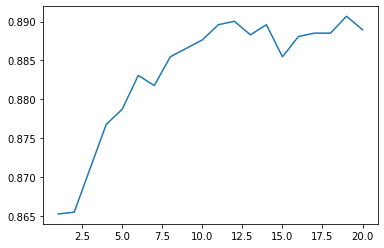

In [78]:
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.arange(1,21), Listn)